# Final Project: 17k App Store Strategy Games Analysis
Samuel Folledo's final project for [DS1.1](https://github.com/Make-School-Courses/DS-1.1-Data-Analysis)

Thank you Tristan for the [17K Mobile Strategy Games
Every strategy game on the Apple App Store Dataset](https://www.kaggle.com/tristan581/17k-apple-app-store-strategy-games) collected on the 3rd of August 2019

In [174]:
# Pandas is a library for basic data analysis
import pandas as pd

# NumPy is a library for advanced mathematical computation
import numpy as np

# MatPlotLib is a library for basic data visualization
import matplotlib.pyplot as plt

# SeaBorn is a library for advanced data visualization
import seaborn as sns

FILEPATH = "appstore_games.csv"
df = pd.read_csv(FILEPATH, 
                 na_values = ['#ERROR!', "nan", "NaN", "Nan", "NA"], encoding="utf-8"
#                  names= ['Name', 'Average User Rating',
#        'User Rating Count', 'Price', 'In-app Purchases', 'Description',
#        'Developer', 'Age Rating', 'Languages', 'Size', 'Primary Genre',
#        'Genres', 'Original Release Date', 'Current Version Release Date']
                )
df.info() #17007, 18

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17007 entries, 0 to 17006
Data columns (total 18 columns):
URL                             17007 non-null object
ID                              17007 non-null int64
Name                            17007 non-null object
Subtitle                        5261 non-null object
Icon URL                        17007 non-null object
Average User Rating             7561 non-null float64
User Rating Count               7561 non-null float64
Price                           16983 non-null float64
In-app Purchases                7683 non-null object
Description                     17007 non-null object
Developer                       17007 non-null object
Age Rating                      17007 non-null object
Languages                       16947 non-null object
Size                            17006 non-null float64
Primary Genre                   17007 non-null object
Genres                          17007 non-null object
Original Release Date       

## Clean the dataframe
1. removed the following columns: URL, ID, Subtitle, Icon URL 
2. turn Age Rating from str type (4+, 9+, 12+ 17+) to int type
3. specify data types

In [175]:
#1.
to_drop = ["URL", "ID", "Subtitle", "Icon URL"]
df.drop(to_drop, inplace=True, axis=1)

#2
df['Age Rating'] = df.apply(lambda x: x['Age Rating'].replace('+', ''), axis=1) #remove all "+" in Age Rating to turn it into an int type
df['Age Rating'] = df['Age Rating'].astype(int)
# print(df['Age Rating'].value_counts())

#Specify data type of non-strings
df['Name'] = df['Name'].astype(str)
df["Name"].replace({r'[^\x00-\x7F]+':''}, regex=True, inplace=True)
# df.Lastname.replace({r'[^\x00-\x7F]+':''}, regex=True, inplace=True)
# df[df['Average User Rating']].value_counts()
df.shape
for name in df.Name.unique():
    if len(name) > 50:
        print("===",name)

=== Gomoku Free (\u4e94\u5b50\u68cb, \u4e94\u76ee\u4e26\u3079, \uc624\ubaa9)
=== MILLIONAIRE TYCOON\u2122 : Free Realestate Trading Strategy Board Game
=== Fragmental 3D Lite - Build Lines with Falling Blocks!
=== Musket & Artillery: American Revolutionary War Lite
=== PocketM - \u0e2b\u0e21\u0e32\u0e01\u0e23\u0e38\u0e01\u0e44\u0e17\u0e22
=== PocketM HD -  \u0e2b\u0e21\u0e32\u0e01\u0e23\u0e38\u0e01\u0e44\u0e17\u0e22
=== Musket & Artillery: American Revolutionary War for iPad
=== Musket & Artillery: American Revolutionary War Lite for iPad
=== Sudoku 81 Squares FREE \u6578\u7368 \uc2a4\ub3c4\ucfe0 81\u4e57 \u0421\u0443\u0434\u043e\u043a\u0443 10000 sudoku puzzles
=== Find the differences Puzzle - Spot the Difference games
=== Are You Quick Enough? Training - The Ultimate Reaction Test
=== Pocket Bugs & Photo Destroyer: Destroy insects and relief stress!
=== Street Parking - 3D car parking and driving simulation
=== Pumpkin Pops! - Free popping strategy game for pumpkin lovers
=== Angry 

In [176]:
# df[df["Name"]].unique()
# df['Name'] = df['Name'].astype(str)
len(df[df['Languages'] != "EN"].values)
df.dtypes

Name                             object
Average User Rating             float64
User Rating Count               float64
Price                           float64
In-app Purchases                 object
Description                      object
Developer                        object
Age Rating                        int64
Languages                        object
Size                            float64
Primary Genre                    object
Genres                           object
Original Release Date            object
Current Version Release Date     object
dtype: object

## Questions to Answer
- Does supporting multiple languages drive more user? or drive better rating?
- Probability of a game getting downloaded based on prices
- What characteristics does top games have in common?
- What did the top 5 most released developers have in common?
- Does age rating affect users rating?

### Helper functions

In [177]:
def conditional_prob(df, column1, value1, column2):
    '''Create a dictionary of "column2_val : percentage" '''
    probabilities = {}
#     column1_is_value1 = df[df[column1] == value1]
    column2_values = set(df[column2].dropna().values) #possible values for target_column
    for column2_value in column2_values: #for each value in target's values
        probabilities[column2_value] = len(df[ (df[column1] == value1) & (df[column2] == column2_value)]) / len(df[df[column1] == value1]) #len(col_1 == value_1 and col_2 == val_2) / len(col_1 == val_1)
    return probabilities

def df_from_col_ratio(df, to_ratio_col, x_col):
    '''Get df with ratio of column based on all possible values or x_col and put it in a line graph'''
    to_ratio_values = [] #unique values of to_ratio_col from df
    x_col_values_dic = {} #{"Promoter": [], "Passive": [], "Detractor":[]} 
    for to_ratio_value in sorted(df[to_ratio_col].dropna().unique()): #loop through each unique values of to_ratio_col
        x_col_ratio_dic = conditional_prob(df, to_ratio_col, to_ratio_value, x_col)
        to_ratio_values.append(to_ratio_value) #append current location
        for key, value in x_col_ratio_dic.items(): #loop through each key,value pairs in dic received from conditional_prob
            if key in x_col_values_dic: #if dic's key has values already
                x_col_values_dic[key].append(value) #if key exist, append value to our list's key
            else:  #if dic's key is none...
                x_col_values_dic[key] = [value] #create the array with our value
    #Turn dic and array to dataframe
    df_new = pd.DataFrame(x_col_values_dic, index=to_ratio_values)
    return df_new


def graph_conditional_prob(df, column1, value1, column2):
    '''get conditional probability and graph of column2 base on column1's value1'''
    probabilities = {}
    column1_is_value1 = df[df[column1] == value1] #all column1 == value1
    column2_values = set(df[column2].dropna().values) #possible values for target_column #Names
    column2_names = []
    column2_percents = []
    column2_explode = [] #explode the biggest percent
    for column2_value in column2_values: #for each value in target's values
        column2_names.append(column2_value) #append name
        #get column2's percent
        c2_percent = len(df[ (df[column1] == value1) & (df[column2] == column2_value)]) / len(df[df[column1] == value1])
        column2_percents.append(c2_percent)
        probabilities[column2_value] = c2_percent
    max_value = max(column2_percents) #get max value that we will explode
    max_index = column2_percents.index(max_value) #get max_value's index
    for i in range(len(column2_percents)): #populate column2_explode
        if i == max_index: #explode the index with max value
            column2_explode.append(0.1)
            continue
        column2_explode.append(0)
    #Begin plotting
    fig1, ax1 = plt.subplots()
    ax1.pie(column2_percents, explode=column2_explode, labels=column2_names, autopct='%1.1f%%',
            shadow=True, startangle=90)
    ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.title(column1+": "+str(value1)+" ("+str(len(column1_is_value1))+")") #assign plot's title
    plt.show()
    return probabilities
# for rating in df["Average User Rating"].dropna().unique():
#     graph_conditional_prob(df, "Average User Rating", rating, "Price")

#function to create a pie chart
def pie_chart_column(df, col_name):
    '''Create a pie chart from a column. Recommended for columns with 2-5 unique values'''
    col_values = df[col_name].dropna().unique()
    col_percentage = []
    for index, value in enumerate(col_values):
        value_count = len(df[(df[col_name] == value)])
        val_percentage = value_count / len(df) #get percentage; by dividing num of rows being value by the total length of dataset
        col_percentage.append(val_percentage) #append percentage
        col_values[index] += " "+str(value_count)
    #Begin plotting
    fig1, ax1 = plt.subplots()
    ax1.pie(col_percentage, labels=col_values, autopct='%1.1f%%', shadow=True, startangle=90)
    ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.title(col_name+" Ratio: Out Of "+str(len(df["Price"].dropna()))+" Apps") #assign plot's title
    plt.show()
    
def custom_hist(ls, interval):
    hist_ls_dict = dict()
    min_ls = np.min(ls)
    max_ls = np.max(ls)
    I = (max_ls - min_ls) / interval #width (x-range) of each bin
    for j in range(int(interval - 1)): #subtract 1 to not go out of range when we j+1
        current_min = min_ls + (I*j) #current minimum
        current_max = min_ls + (I*(j+1)) #j+1 to get current maximum range
        count_from_min_to_max = sum(current_min <= elem < current_max for elem in ls) / len(ls) #get the sum of number of elements greater than min and less than max
        hist_ls_dict[j]= count_from_min_to_max   
    return hist_ls_dict
# age_hist = custom_hist(df['Age'].dropna().values, 16)

### Q1 What are the top free and paid apps?

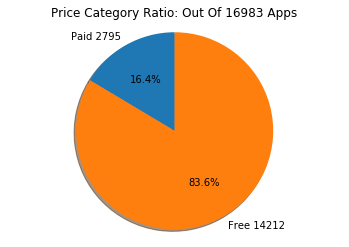

In [178]:
free_games = df[df["Price"] == 0].dropna()
paid_games = df[df["Price"] > 0].dropna()

# function to categorize Free apps from Paid
def get_price_category(price):
    if price == 0:
        return "Free"
    else:
        return "Paid" 

# Create another column named "Price Category" with values of either Free or Paid
df["Price Category"] = df.apply(lambda row: get_price_category(row["Price"]), axis=1)

#function to create a pie chart
def pie_chart_column(df, col_name):
    '''Create a pie chart from a column. Recommended for columns with 2-5 unique values'''
    col_values = df[col_name].dropna().unique()
    col_percentage = []
    for index, value in enumerate(col_values):
        value_count = len(df[(df[col_name] == value)])
        val_percentage = value_count / len(df) #get percentage; by dividing num of rows being value by the total length of dataset
        col_percentage.append(val_percentage) #append percentage
        col_values[index] += " "+str(value_count)
    #Begin plotting
    fig1, ax1 = plt.subplots()
    ax1.pie(col_percentage, labels=col_values, autopct='%1.1f%%', shadow=True, startangle=90)
    ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.title(col_name+" Ratio: Out Of "+str(len(df["Price"].dropna()))+" Apps") #assign plot's title
    plt.show()

pie_chart_column(df, "Price Category")

### Q2 How are most strategy games rated?

Price Category
Free    AxesSubplot(0.125,0.125;0.775x0.755)
Paid    AxesSubplot(0.125,0.125;0.775x0.755)
Name: Average User Rating, dtype: object

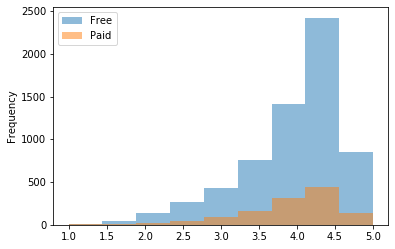

In [179]:
df.groupby('Price Category')['Average User Rating'].plot(bins=9, kind='hist', legend=True, alpha=0.5)

In [180]:
# print("LENGTH=",len(df["Price"].value_counts()))
# df["Price"].value_counts()
pd.crosstab(df['Price'], df['Average User Rating'])

Average User Rating,1.0,1.5,2.0,2.5,3.0,3.5,4.0,4.5,5.0
Price,,,,,,,,,
0.00,5,46,136,268,427,758,1413,2423,849
0.99,1,5,8,19,34,57,89,101,38
1.99,2,2,5,7,16,21,51,69,28
2.99,3,3,5,14,15,29,57,98,28
3.99,0,0,1,2,6,13,25,47,11
4.99,2,4,1,4,11,23,46,72,22
5.99,0,0,0,2,1,7,5,11,2
6.99,0,0,0,0,0,7,5,12,2
7.99,0,0,0,0,1,1,3,4,1


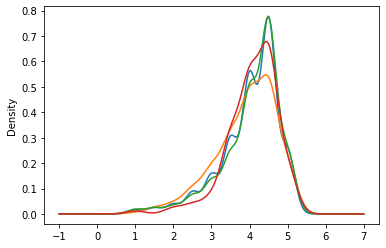

In [190]:
df[df['Price'] > 0]['Average User Rating'].plot(kind='kde') #blue
df[(df['Price'] > 0) & (df['Price'] < 1)]['Average User Rating'].plot(kind='kde') #orange
df[(df['Price'] > 1) & (df['Price'] < 5)]['Average User Rating'].plot(kind='kde') #green
df[(df['Price'] > 5)]['Average User Rating'].plot(kind='kde') #red

## Answer
- Strategy games are popular and loved, and usually receives a 4.5 rating

## Q3 What did the top 5 most released developers have in common?

In [191]:
print(df[df["Developer"].isin(df["Developer"].value_counts().index[df["Developer"].value_counts().gt(70)])]["Developer"].value_counts()) #get the value counts of Developers that has more than 70 apps

Tapps Tecnologia da Informa\xe7\xe3o Ltda.    123
Vikash Patel                                  107
Netsummit Marketing, Inc.                      95
GabySoft                                       85
NetSummit Enterprises, Inc.                    77
Name: Developer, dtype: int64


## Q4 Analyze mobile apps that primary genre is not Games or common

In [7]:
# df[df["Primary Genre"].isin(df["Primary Genre"].value_counts().index[df["Primary Genre"].value_counts().gt(50)])] #one line version
print(df["Primary Genre"].value_counts())
v = df["Primary Genre"].value_counts()
row_values = v.index #get values from Primary Genre as an arary
df[df["Primary Genre"].isin(row_values[v.lt(10)])] #get rows that Primary Genre's value counts is less than 10

Games                16286
Education              222
Entertainment          198
Utilities               77
Sports                  60
Reference               32
Stickers                29
Finance                 18
Business                16
Productivity            15
Lifestyle               10
Social Networking        9
Book                     9
News                     7
Health & Fitness         5
Food & Drink             4
Navigation               3
Music                    3
Medical                  2
Travel                   1
Shopping                 1
Name: Primary Genre, dtype: int64


,Name,Average User Rating,User Rating Count,Price,In-app Purchases,Description,Developer,Age Rating,Languages,Size,Primary Genre,Genres,Original Release Date,Current Version Release Date
234,Bungee Stickmen - Australian Landmarks {LITE +},3.0,1229.0,0.00,"37.99, 199.99, 0.99",\u2588 Have hours of fun doing 180 jumps in th...,Poulet Maison Ptd Ltd,12,"ZH, EN, FR, DE, IT, JA, ES",10781853.0,Medical,"Medical, Adventure, Strategy, Games",13/01/2010,27/02/2010
235,Bungee Stickmen - Australian Landmarks {LITE +},3.0,1229.0,0.00,"37.99, 199.99, 0.99",\u2588 Have hours of fun doing 180 jumps in th...,Poulet Maison Ptd Ltd,12,"ZH, EN, FR, DE, IT, JA, ES",10781853.0,Medical,"Medical, Adventure, Strategy, Games",13/01/2010,27/02/2010
650,Go Books,4.0,156.0,0.00,"4.99, 4.99, 6.99, 6.99, 6.99, 4.99, 8.99, 6.99...","""Enjoy high-quality books about the game of Go...","Smart Go, Inc.",4,"EN, FR, DE, JA, ES",20283392.0,Book,"Books, Games, Board, Strategy",11/04/2011,17/11/2018
836,Global Tube Adventure,3.5,8.0,0.00,0.99,Global Tube Adventure - make your way to the t...,dijipiji,12,EN,12104704.0,Travel,"Travel, Games, Strategy, Simulation",30/08/2011,27/02/2017
2565,Dark Forest - HORROR GameBook,4.0,103.0,0.00,2.99,Mystery and Horror Book with multiple endings....,Living a Book Inc.,9,EN,69989376.0,Book,"Books, Role Playing, Games, Strategy",10/09/2013,18/05/2019
2619,Gaming News & Reviews - NF,4.5,370.0,0.00,2.99,"""#1 Source For New Video Games, Trailers and R...",Newsfusion Ltd.,12,EN,83920896.0,News,"News, Games, Strategy, Action",16/10/2013,28/03/2018
2977,GO Game On!,NaN,NaN,0.00,NaN,"Hey, we are all gamers at heart whether you pl...","Great Oak, Inc",12,EN,8859648.0,News,"News, Games, Strategy, Action",10/01/2014,22/02/2014
4444,ScADvenger,NaN,NaN,0.00,2.99,"The easiest way to run custom, interactive sca...","BizTechies, Inc.",4,EN,29395968.0,Social Networking,"Social Networking, Adventure, Strategy, Games",6/04/2016,6/04/2016
4727,Criminal Mind - Mystery hooked,4.5,8.0,0.00,3.99,Language: English & Spanish --- 200 pages...,Living a Book Inc.,17,EN,77360128.0,Book,"Books, Games, Role Playing, Strategy",19/10/2014,18/05/2019
4977,AwesomePlus,NaN,NaN,0.00,"1.99, 2.99, 3.99, 5.99",Awesome is an integrated message app with mult...,V3REE INNOVATION LIMITED,4,"NL, EN, FR, DE, ID, IT, JA, KO, PL, RU, ZH, ES...",256663552.0,Social Networking,"Social Networking, Casual, Strategy, Games",22/08/2017,25/06/2019
